# Dataset
## 5G Mimo Beam Selection

#### Necessary imports

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import sklearn

#### Loading Classification Dataset

In [2]:
train_set_classification = np.load('all_train_classification.npz')
train_set_classification.files

['position_matrix_array', 'best_ray_array']

In [3]:
test_set_classification = np.load('all_test_classification.npz')
test_set_classification.files

['position_matrix_array', 'best_ray_array']

In [4]:
train_class_position_matrix = train_set_classification['position_matrix_array']
train_class_best_ray = train_set_classification['best_ray_array'] 

test_class_position_matrix = test_set_classification['position_matrix_array']
test_class_best_ray = test_set_classification['best_ray_array'] 

### Training Set

### Position Matrix Array
27k+ datapoints: each shaped 23 X 250

### Best Ray Array
27k+ datapoints: each shaped 2 X 1

In [5]:
print('Position Matrix Array Shape: ', train_class_position_matrix.shape)
print('Best Ray Array Shape: ', train_class_best_ray.shape)

Position Matrix Array Shape:  (27900, 23, 250)
Best Ray Array Shape:  (27900, 2)


### Testing set

### Position Matrix Array
13k+ datapoints: each shaped 23 X 250
### Best Ray Array
13k+ datapoints: each shaped 2 X 1

In [6]:
print('Position Matrix Array Shape: ', test_class_position_matrix.shape)
print('Best Ray Array Shape: ', test_class_best_ray.shape)

Position Matrix Array Shape:  (13123, 23, 250)
Best Ray Array Shape:  (13123, 2)


In [7]:
for i in range(500):
    save_path = 'images/img' + str(i) + '.png'
    matplotlib.image.imsave(save_path, train_class_position_matrix[i])
    
## Convert above images to a video file using FFMPEG
## ffmpeg -i img%01d.png -c:v libx264 -vf fps=25 -vf "pad=ceil(iw/2)*2:ceil(ih/2)*2" -pix_fmt yuv420p out.mp4

### Position Ray Array

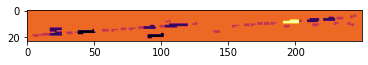

In [8]:
plt.imshow(train_class_position_matrix[5], cmap=plt.cm.inferno)

each pixel of Position Matrix array contains either of 6 values:  
[-4, -3, -2, -1, 0, 2]

__0__: Represents blank space [roads, space between vehicles]  
__Negative Values:__ Other Vehicles  
__2:__ Reciever

In [9]:
np.unique(train_class_position_matrix[:100])

array([-4, -3, -1,  0,  2], dtype=int8)

### Best Ray Ray

[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


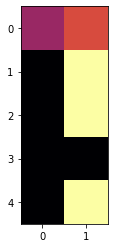

In [11]:
print(np.unique(train_class_best_ray))
plt.imshow(train_class_best_ray[np.random.choice(train_class_best_ray.shape[0], size=5,replace=False)],
           cmap=plt.cm.inferno)

#### Loading Regression Dataset

In [12]:
train_set_regression = np.load('all_train_regression.npz')
train_set_regression.files

['position_matrix_array', 'best_ray_array']

In [13]:
test_set_regression = np.load('all_test_regression.npz')
test_set_regression.files

['position_matrix_array', 'best_ray_array']

In [14]:
train_reg_position_matrix = train_set_regression['position_matrix_array']
train_reg_best_ray = train_set_regression['best_ray_array']

test_reg_position_matrix = test_set_regression['position_matrix_array']
test_reg_best_ray = test_set_regression['best_ray_array']

Since the Position Matrix Array is the same for both regression and classification  
We will only discuss the best ray array

The values are angles:
1. Departure: Azimuthal
2. Departure: Elevation
3. Arrival: Azimuthal
4. Arrival Elevation

In [15]:
print(train_reg_best_ray.shape)
train_reg_best_ray[5]

(27900, 4)


array([ 89.8105,  84.5901,  90.1895, -95.4099], dtype=float32)

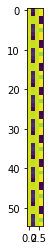

In [20]:
plt.imshow(train_reg_best_ray[45:100])